<a href="https://colab.research.google.com/github/Swapnil-IITTirupati/CampusX/blob/main/Campus_X_from_Lec_29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sklearn  pipelines

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/CAMPUS_X_LEC_19_DATASET.csv')
df

In [ ]:
df.drop(columns = ['PassengerId','Name','Cabin','Ticket'],inplace = True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns = ['Survived']),df['Survived'], test_size = 0.3, shuffle = True)
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
46,3,male,NaN,1,0,15.50,Q
822,1,male,38.0,0,0,0.00,S
401,3,male,26.0,0,0,8.05,S
280,3,male,65.0,0,0,7.75,Q
617,3,female,26.0,1,0,16.10,S
...,...,...,...,...,...,...,...
360,3,male,40.0,1,4,27.90,S
302,3,male,19.0,0,0,0.00,S
589,3,male,NaN,0,0,8.05,S
237,2,female,8.0,0,2,26.25,S


In [ ]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
# pipeline is important because u cant provide the different transformers for the same column
transformer1 = [('SimpleImp',SimpleImputer(strategy = 'most_frequent')),
                 ('OHE',OneHotEncoder())]
pipeline = Pipeline(transformer1)
transformer = ColumnTransformer(transformers = [
  ('tnf1',SimpleImputer(strategy='mean'),[2]),
  ('tnf2',pipeline,[6]),
  ('tnf3',OneHotEncoder(sparse = False, dtype = np.int32,drop = 'first'),[1])
],remainder = 'passthrough')

In [ ]:
X_train_new = transformer.fit_transform(X_train)
X_test_new = transformer.transform(X_test)
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth = 3)
DT.fit(X_train_new,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


DecisionTreeClassifier(max_depth=3)

In [ ]:
df['Embarked'].nunique()

3

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = DT.predict(X_test_new)
print(accuracy_score(y_test,y_pred))

0.8395522388059702


In [ ]:
# how to save the model
import pickle
pickle.dump(DT,open('model1.pkl','wb'))
pickle.dump(transformer,open('trans1.pkl','wb'))


In [ ]:
# Now lets test the case
transformer = pickle.load(open('/content/trans1.pkl','rb'))
model = pickle.load(open('/content/model1.pkl','rb'))
# Assume user input
# Pclass/gender/age/SibSp/Parch/Fare/Embarked
test_input = np.array([2, 'male', 31.0, 0, 0, 10.5, 'S']).reshape(1,7)


In [ ]:
test_input1 = transformer.transform(test_input)
y_pred1 = model.predict(test_input1)
print(y_pred1)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


# Pipeline in deep

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, chi2


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CAMPUS_X_LEC_19_DATASET.csv')
#df
df.drop(columns = ['PassengerId','Name','Ticket','Cabin'],inplace = True)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns = ['Survived']),df['Survived'],shuffle = True, test_size = 0.3)
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
217,2,male,42.0,1,0,27.0000,S
660,1,male,50.0,2,0,133.6500,S
474,3,female,22.0,0,0,9.8375,S
480,3,male,9.0,5,2,46.9000,S
210,3,male,24.0,0,0,7.0500,S
...,...,...,...,...,...,...,...
628,3,male,26.0,0,0,7.8958,S
685,2,male,25.0,1,2,41.5792,C
577,1,female,39.0,1,0,55.9000,S
31,1,female,NaN,1,0,146.5208,C


In [ ]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
# Imputer transformation
trf1 = ColumnTransformer(transformers = [
    ('Impute_Age',SimpleImputer(strategy  = 'mean'),[2]),
    ('Impute_Embarked',SimpleImputer(strategy = 'most_frequent'),[6])
],remainder = 'passthrough')

In [ ]:
# OneHotEncoder
trf2 = ColumnTransformer(transformers = [
    ('ohe_sex_embarked',OneHotEncoder(sparse = False, handle_unknown = 'ignore'),[1,6])
],remainder = 'passthrough')

In [ ]:
#scaling
trf3 = ColumnTransformer(transformers = [
    ('Scaling',MinMaxScaler(),slice(0,10))
])

In [ ]:
# feature selection
trf4 = SelectKBest(score_func=chi2,k=8)

In [ ]:
# Decision tree classifier
trf5 = DecisionTreeClassifier()

In [ ]:
# creaiting pipeline via two methods
# using pipeline u have to mention the names also.
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('trf4',trf4),
    ('trf5',trf5),
])
# vs make pipeline in this method there is no requirement to mention the steps
#pipe = make_pipeline(trf1,trf2,trf3,trf4,trf5)
# but for using GridSearchCV u have to use first one most probabably.


In [ ]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Impute_Age', SimpleImputer(),
                                                  [2]),
                                                 ('Impute_Embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 6])])),
                ('trf3',
                 ColumnTransformer(transformers=[('Scaling', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('trf4',
                 SelectKBest(k=8,
                             score_func=<function chi2 at 0x7f4dad78d360>)),
                ('trf5', DecisionTreeClassifier())])

Let's explore the pipeline

In [ ]:
pipe.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('Impute_Age', SimpleImputer(), [2]),
                                 ('Impute_Embarked',
                                  SimpleImputer(strategy='most_frequent'),
                                  [6])]),
 'trf2': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe_sex_embarked',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  [1, 6])]),
 'trf3': ColumnTransformer(transformers=[('Scaling', MinMaxScaler(),
                                  slice(0, 10, None))]),
 'trf4': SelectKBest(k=8, score_func=<function chi2 at 0x7f4dad78d360>),
 'trf5': DecisionTreeClassifier()}

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = pipe.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.6044776119402985


In [ ]:
# cross validation using cross val score
from sklearn.model_selection import cross_val_score
cross_val_score(pipe,X_train,y_train,cv = 5,scoring = 'accuracy').mean()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

0.6500645161290322

In [ ]:
# Grid search CV
params = {
    'trf5__max_depth':[1,2,3,4,5,None],
    'trf5__criterion':['gini','entropy','log_loss'],
    'trf5__splitter':['best','random']
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe,params,cv = 5, scoring = 'accuracy')
grid.fit(X_train,y_train)

In [ ]:
grid.best_score_

0.6500645161290322

In [ ]:
grid.best_params_

{'trf5__criterion': 'gini', 'trf5__max_depth': 5, 'trf5__splitter': 'best'}

# Exporting the pipeline



In [ ]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

# Function Transformers




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
# for plotting the QQ plot the new library is required
import scipy.stats as sc

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CAMPUS_X_LEC_19_DATASET.csv')
df = df[['Age','Survived','Fare']]
df

,Age,Survived,Fare
0,22.0,0,7.2500
1,38.0,1,71.2833
2,26.0,1,7.9250
3,35.0,1,53.1000
4,35.0,0,8.0500
...,...,...,...
886,27.0,0,13.0000
887,19.0,1,30.0000
888,NaN,0,23.4500
889,26.0,1,30.0000


<ipython-input-123-98afa474304c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],hist = False,ax = ax1)
<ipython-input-123-98afa474304c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'],hist = False,ax = ax2)


Text(0.5, 1.0, 'Fare distplot before the function Transformer')

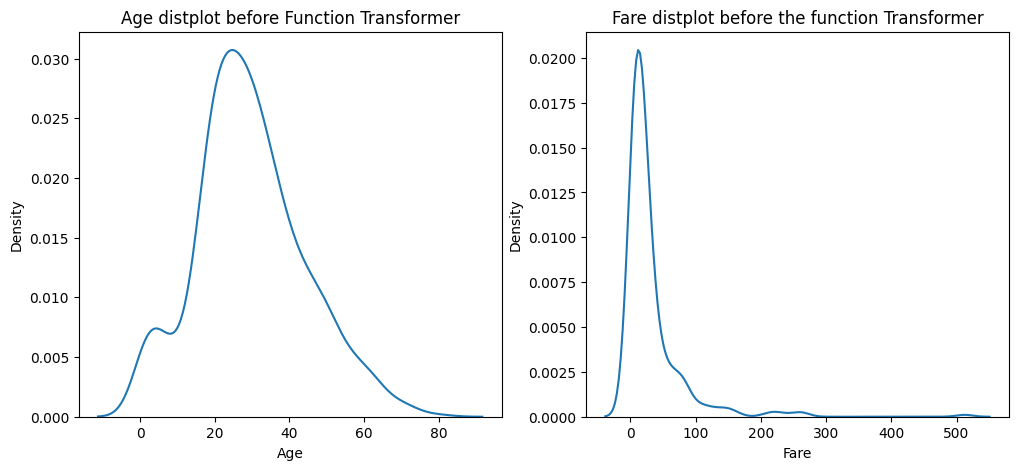

In [ ]:
fig1,(ax1,ax2)  = plt.subplots(ncols = 2,figsize = (12,5))
sns.distplot(df['Age'],hist = False,ax = ax1)
ax1.set_title("Age distplot before Function Transformer")
sns.distplot(df['Fare'],hist = False,ax = ax2)
ax2.set_title("Fare distplot before the function Transformer")


In [ ]:
X= df.loc[:,['Fare','Age']]
y = df.loc[:,'Survived']
X['Age'].fillna(df['Age'].mean(),inplace = True)
y.isna().sum()

0

In [ ]:
X['Age'].isna().sum()

0

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, shuffle = True, test_size = 0.3)
LR = LogisticRegression()
DT = DecisionTreeClassifier()
LR.fit(X_train,y_train)
DT.fit(X_train,y_train)
y_pred1 = LR.predict(X_test)
y_pred2 = DT.predict(X_test)
print(accuracy_score(y_pred1,y_test))
print(accuracy_score(y_pred2,y_test))
# lets check by cross validation score
print(cross_val_score(LR,X,y,scoring = 'accuracy',cv = 10).mean())
print(cross_val_score(DT,X,y,scoring = 'accuracy',cv = 10).mean())

0.6567164179104478
0.6604477611940298
0.6589013732833957
0.6543445692883895


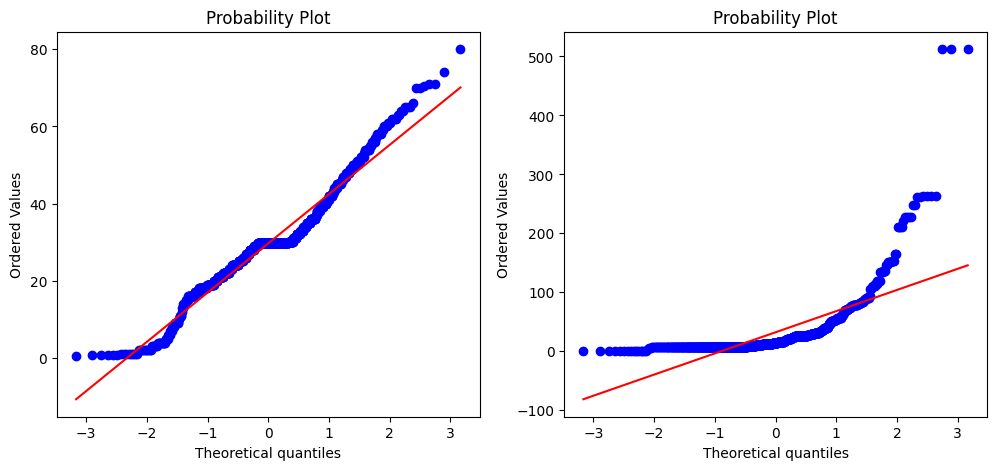

In [ ]:
# lets plot the QQ plot
fig,(ax1,ax2) = plt.subplots(ncols = 2,figsize = (12,5))
(sc.probplot(X['Age'],dist = 'norm',plot= ax1))
(sc.probplot(X['Fare'],dist = 'norm',plot= ax2))
plt.show()

In [ ]:
# Now let's do the Function Transformer
ft = FunctionTransformer(np.log1p) # u cab use log also but log1p used to take out values after adding 1
trf2 = ColumnTransformer(transformers =[
    ('Age',ft,['Age'])
],remainder = 'passthrough')

In [ ]:
X_train_transformed = trf2.fit_transform(X_train)
X_test_transformed = trf2.transform(X_test)
X_transformed = trf2.fit_transform(X)
LR = LogisticRegression()
DT = DecisionTreeClassifier()
LR.fit(X_train_transformed,y_train)
DT.fit(X_train_transformed,y_train)
y_pred1 = LR.predict(X_test_transformed)
y_pred2 = DT.predict(X_test_transformed)
print(accuracy_score(y_pred1,y_test))
print(accuracy_score(y_pred2,y_test))
# lets check by cross validation score
print(cross_val_score(LR,X_transformed,y,scoring = 'accuracy',cv = 10).mean())
print(cross_val_score(DT,X_transformed,y,scoring = 'accuracy',cv = 10).mean())



In [ ]:
X_transformed = pd.DataFrame(X_transformed, columns = X.columns)

<ipython-input-180-1d2a776a3cb3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_transformed,hist = False,ax = ax1)


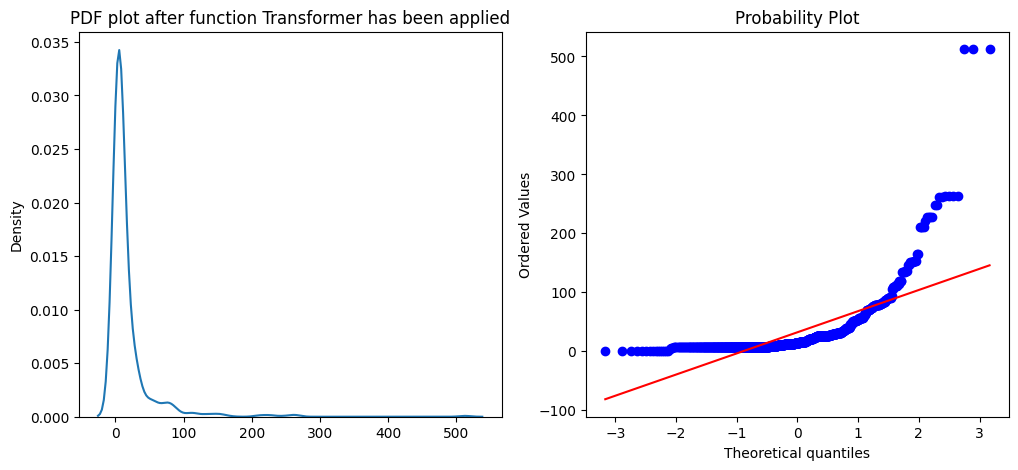

In [ ]:
# Plotting after the function transformation
fig,(ax1,ax2) = plt.subplots(ncols = 2,figsize = (12,5))
sns.distplot(X_transformed,hist = False,ax = ax1)
ax1.set_title('PDF plot after function Transformer has been applied')
sc.probplot(X_transformed['Age'],dist = 'norm',plot = ax2)
plt.show()


# Power Transformer

In [ ]:
# Box-cox Transformer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/concrete_data.csv')
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [ ]:
#df.isna().sum()
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
# Let's do the initial things without the power transformer
LR = LinearRegression()
X = df.drop(columns = ['Strength'])
y = df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state= 42)
LR.fit(X_train,y_train)
y_pred1 = LR.predict(X_test)
# For Linear Regression we have to use r2 score
print(r2_score(y_test,y_pred1))

0.627553179231485


In [ ]:
print((cross_val_score(LR,X,y,cv = 5,scoring = 'r2')).mean())

0.46099404916628606


<ipython-input-37-97860c66656b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[i],hist = False, ax = ax1)


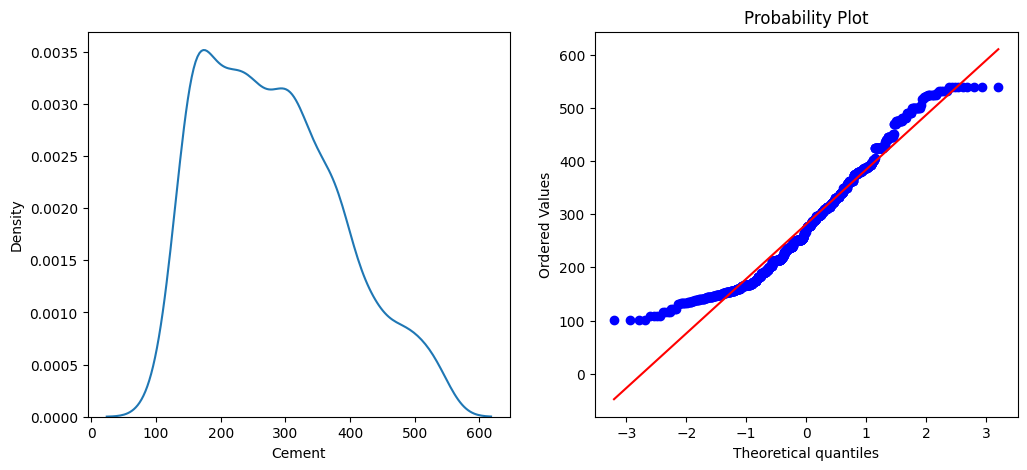

<ipython-input-37-97860c66656b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[i],hist = False, ax = ax1)


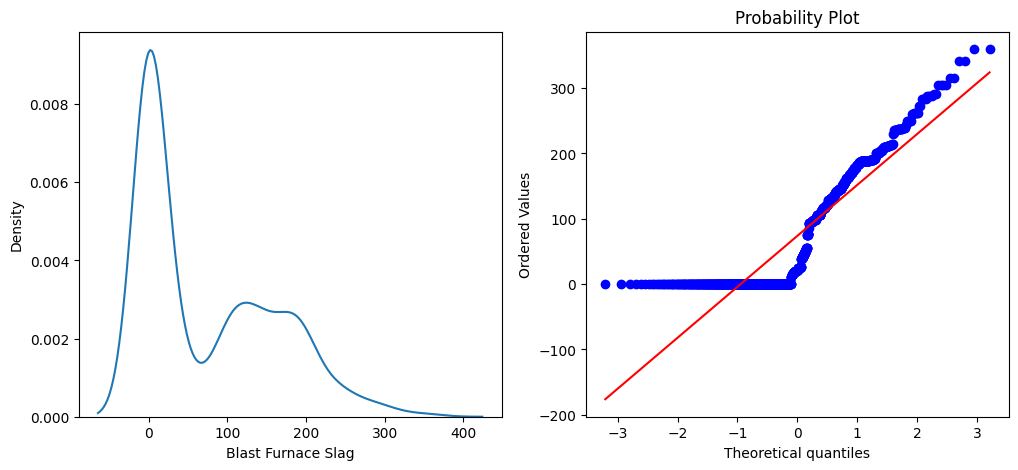

<ipython-input-37-97860c66656b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[i],hist = False, ax = ax1)


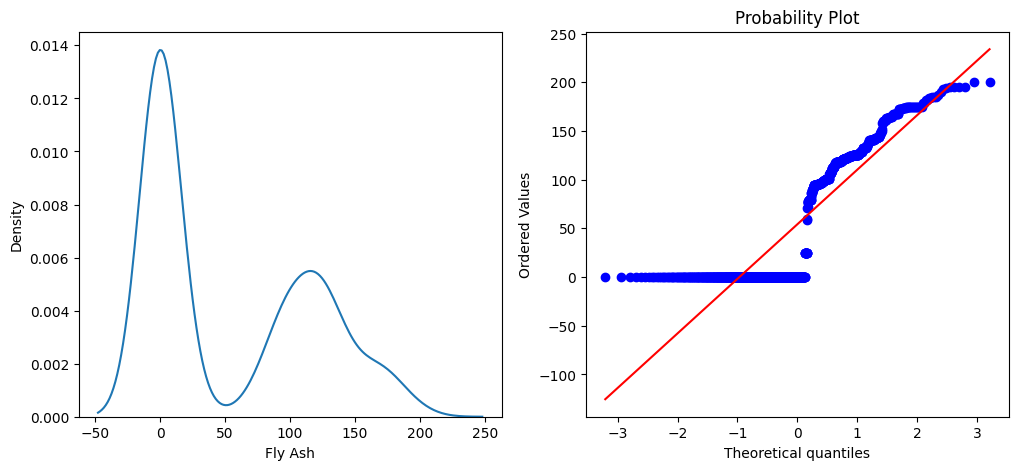

<ipython-input-37-97860c66656b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[i],hist = False, ax = ax1)


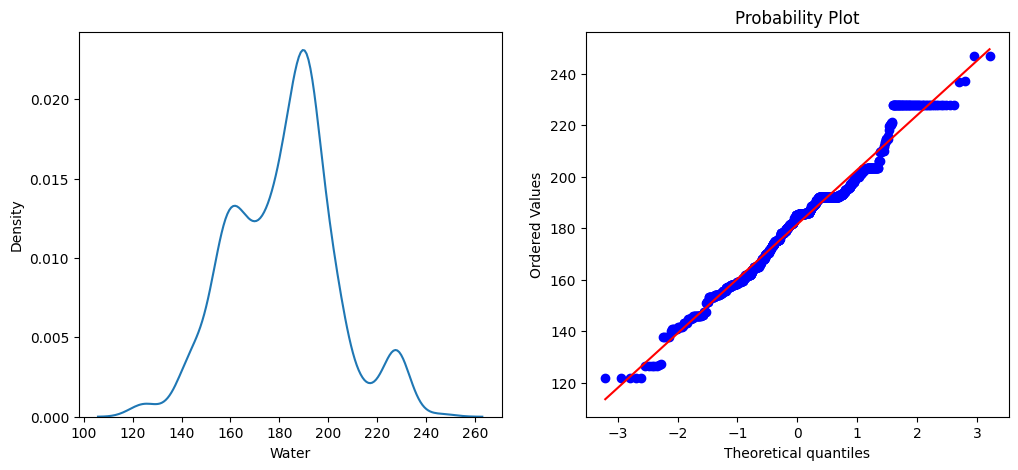

<ipython-input-37-97860c66656b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[i],hist = False, ax = ax1)


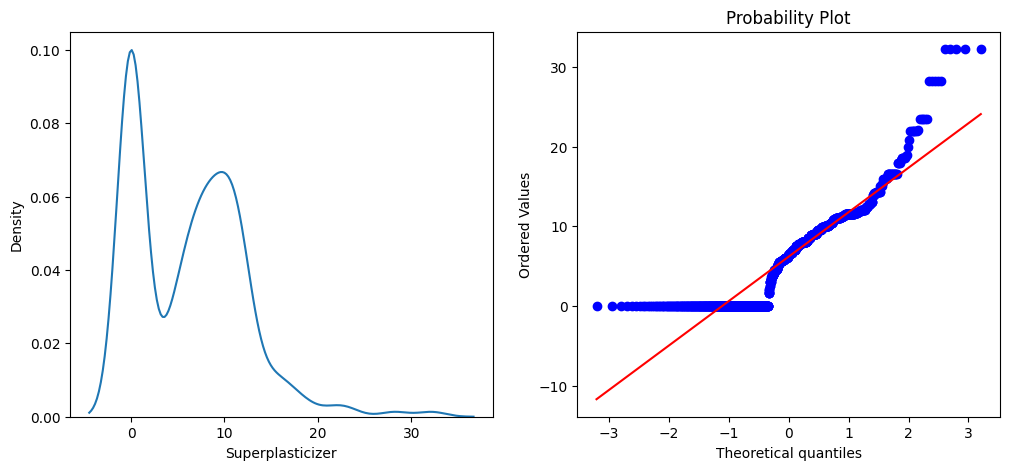

<ipython-input-37-97860c66656b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[i],hist = False, ax = ax1)


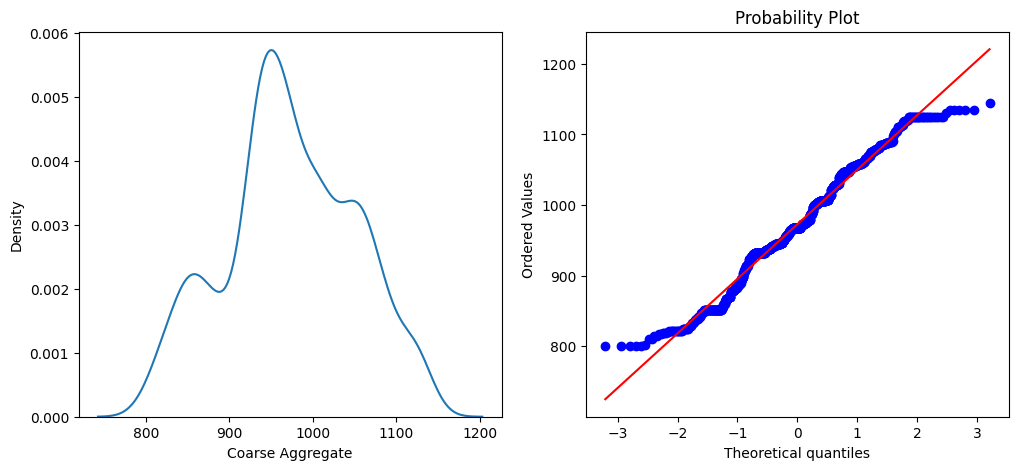

<ipython-input-37-97860c66656b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[i],hist = False, ax = ax1)


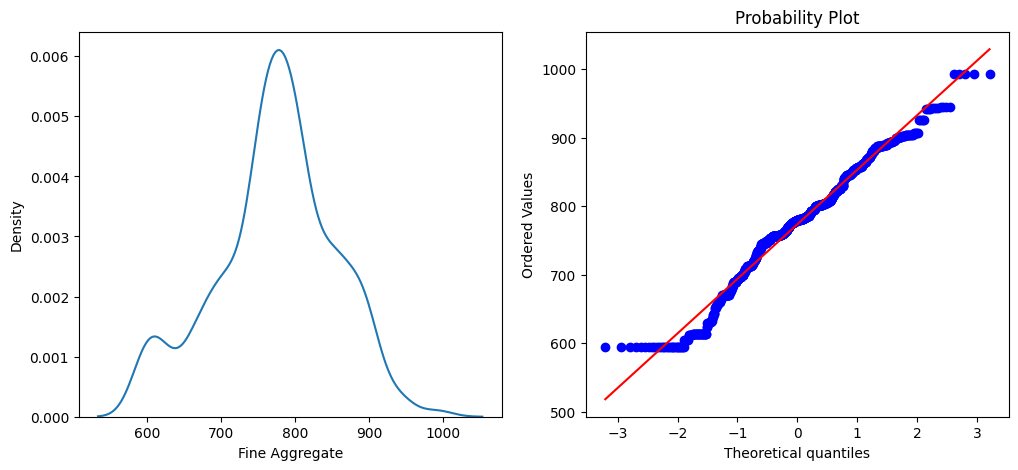

<ipython-input-37-97860c66656b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[i],hist = False, ax = ax1)


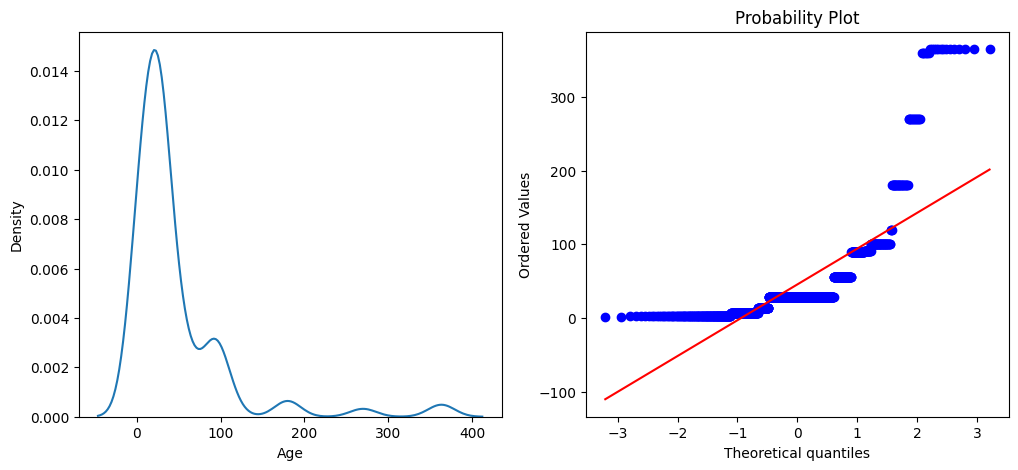

In [ ]:
for i in df.drop(columns = ['Strength']).columns:
  fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (12,5))
  sns.distplot(X[i],hist = False, ax = ax1)
  sc.probplot(X[i],dist = 'norm', plot = ax2)
  plt.show()

In [ ]:
# Now lets apply box-cox
trf1 = PowerTransformer(method = 'box-cox')
X_train_transformed = trf1.fit_transform(X_train+0.00000001)
X_test_transformed = trf1.transform(X_test+0.0000001)
LR = LinearRegression()
LR.fit(X_train_transformed,y_train)
y_pred2 = LR.predict(X_test_transformed)
print(r2_score(y_pred2,y_test))

0.7596623822791454


In [ ]:
X_transformed = trf1.fit_transform(X+0.000001)
print((cross_val_score(LR,X_transformed,y,cv = 5)).mean())

0.6662950327879319


<ipython-input-48-d9ecb0136c61>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_transformed[i],hist = False, ax = ax1)


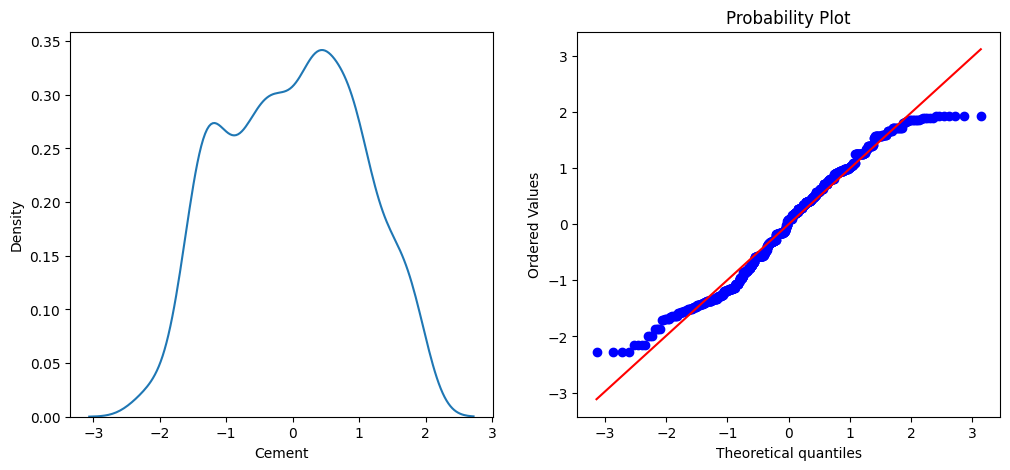

<ipython-input-48-d9ecb0136c61>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_transformed[i],hist = False, ax = ax1)


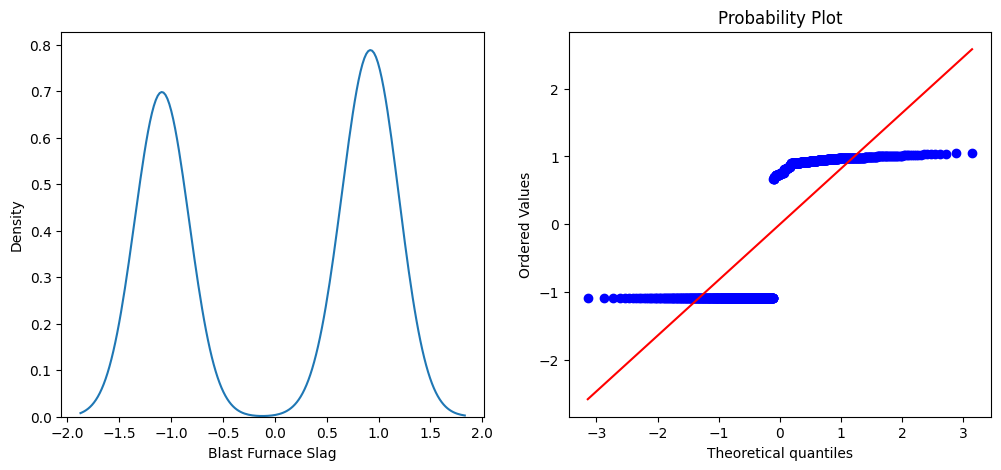

<ipython-input-48-d9ecb0136c61>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_transformed[i],hist = False, ax = ax1)


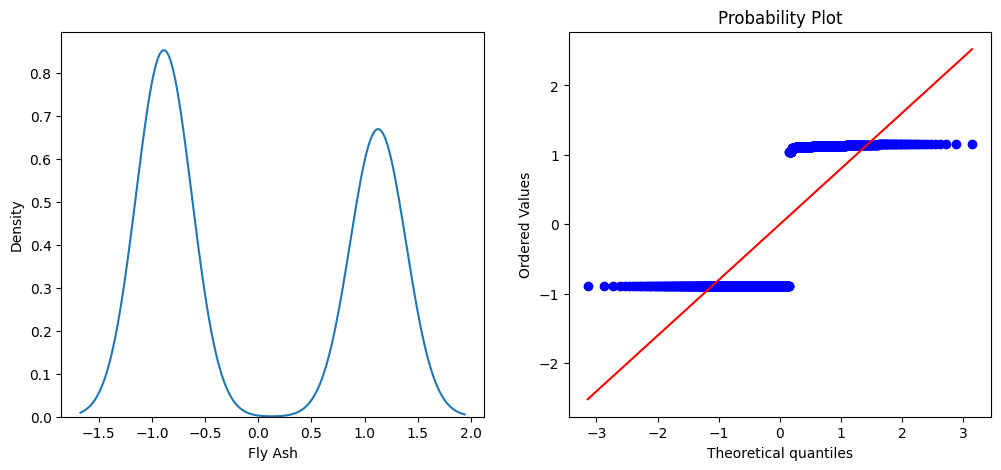

<ipython-input-48-d9ecb0136c61>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_transformed[i],hist = False, ax = ax1)


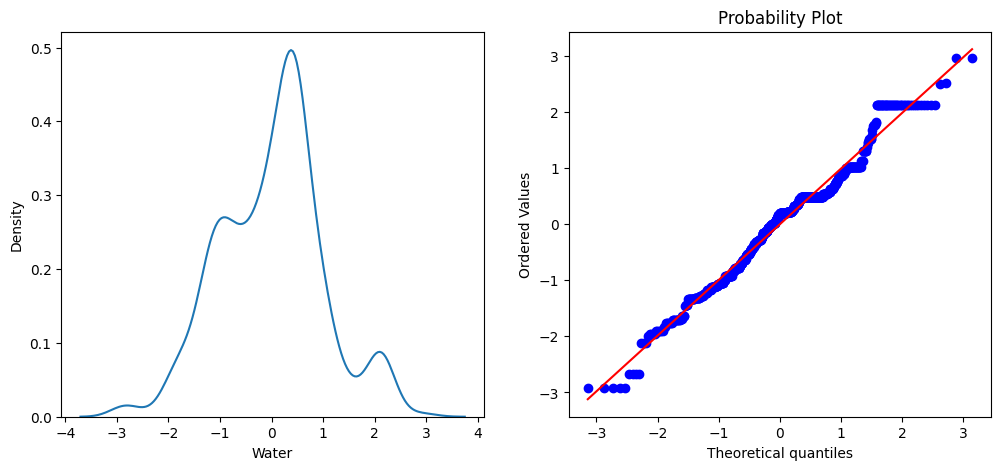

<ipython-input-48-d9ecb0136c61>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_transformed[i],hist = False, ax = ax1)


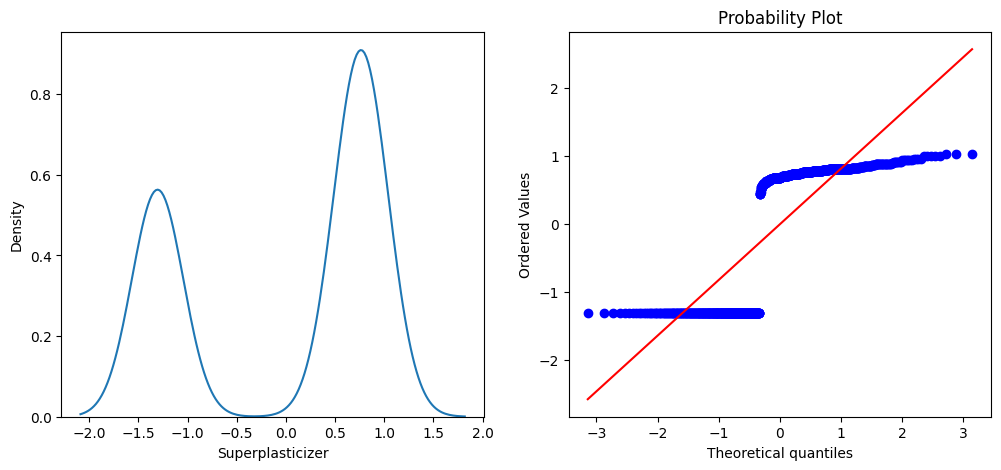

<ipython-input-48-d9ecb0136c61>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_transformed[i],hist = False, ax = ax1)


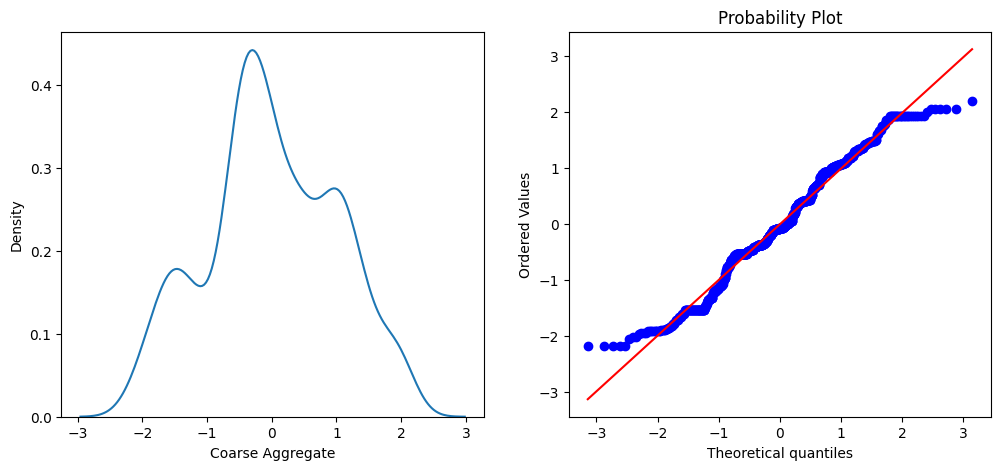

<ipython-input-48-d9ecb0136c61>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_transformed[i],hist = False, ax = ax1)


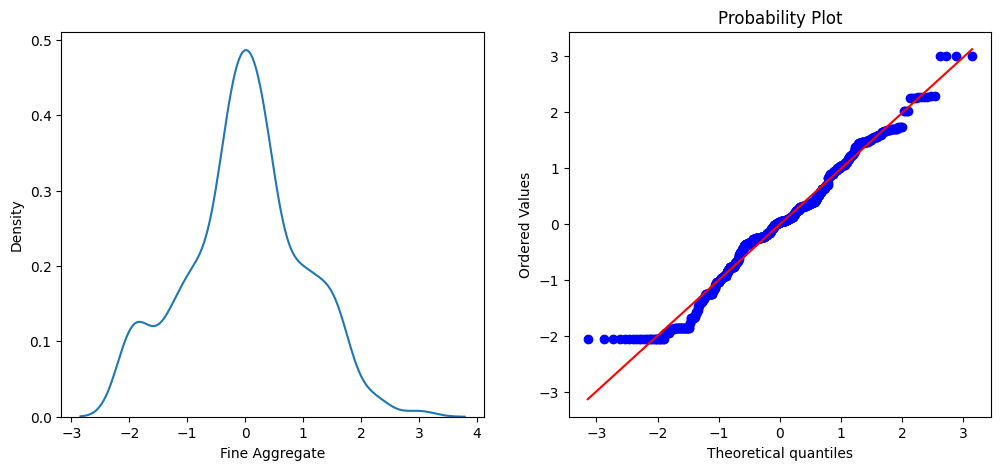

<ipython-input-48-d9ecb0136c61>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_transformed[i],hist = False, ax = ax1)


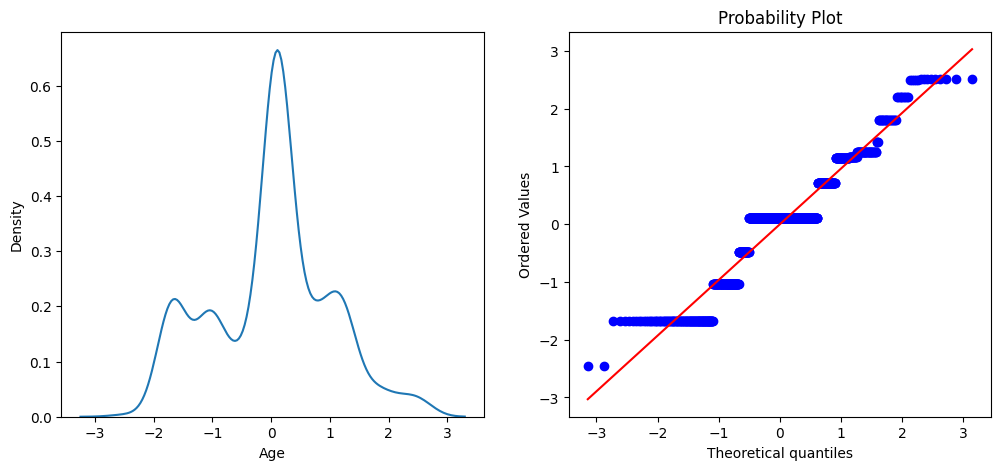

In [ ]:
X_transformed = pd.DataFrame(X_train_transformed, columns = X_train.columns)
for i in df.drop(columns = ['Strength']).columns:
  fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (12,5))
  sns.distplot(X_transformed[i],hist = False, ax = ax1)
  sc.probplot(X_transformed[i],dist = 'norm', plot = ax2)
  plt.show()

In [ ]:
#using the 'yeo Johnson Transformer'
pt = PowerTransformer(method = 'yeo-johnson') # default = yeo johnson
X_train_transformed1 = pt.fit_transform(X_train)
X_test_transformed1 = pt.transform(X_test)
X_transformed1 = pt.fit_transform(X)
LR = LinearRegression()
LR.fit(X_train_transformed1,y_train)
y_pred3 = LR.predict(X_test_transformed1)
y_test = np.array(y_test)
print(r2_score(y_pred3,y_test))
print((cross_val_score(LR,X_transformed1,y,cv = 5,scoring = 'r2')).mean())

0.7797686951132846
0.6834625141500866


In [ ]:
pd.DataFrame({'Columns': X_train.columns,'Yeo-johnson lamdas':pt.lambdas_,'box-cox lambdas':trf1.lambdas_})

,Columns,Yeo-johnson lamdas,box-cox lambdas
0,Cement,0.169544,0.177025
1,Blast Furnace Slag,0.016633,0.020795
2,Fly Ash,-0.136480,-0.031170
3,Water,0.808438,0.772681
4,Superplasticizer,0.264160,0.077874
5,Coarse Aggregate,1.129395,1.129813
6,Fine Aggregate,1.830763,1.782018
7,Age,0.001771,0.066631


<ipython-input-70-377990799bb1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_transformed1[i],hist = False, ax = ax1)


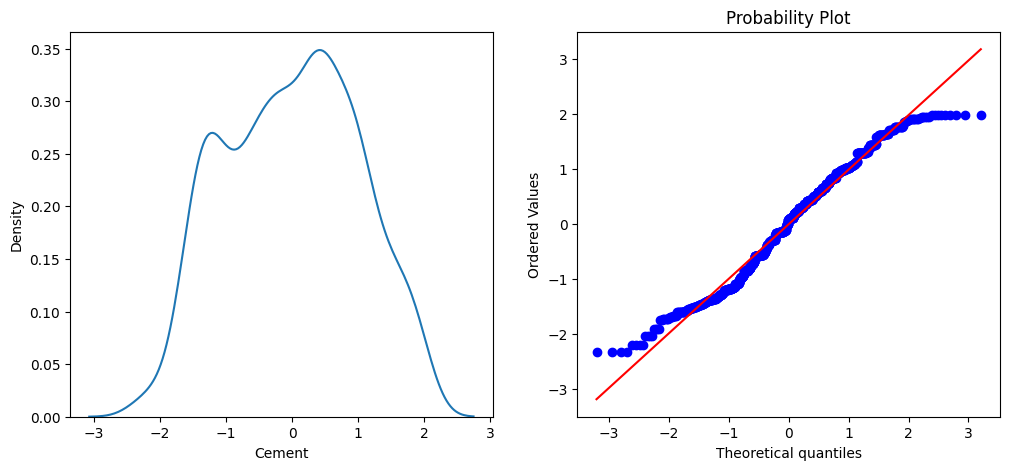

<ipython-input-70-377990799bb1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_transformed1[i],hist = False, ax = ax1)


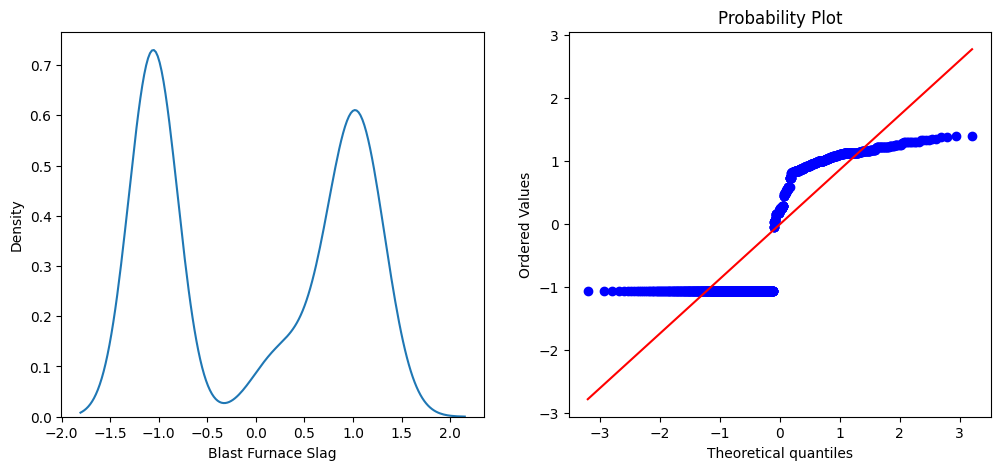

<ipython-input-70-377990799bb1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_transformed1[i],hist = False, ax = ax1)


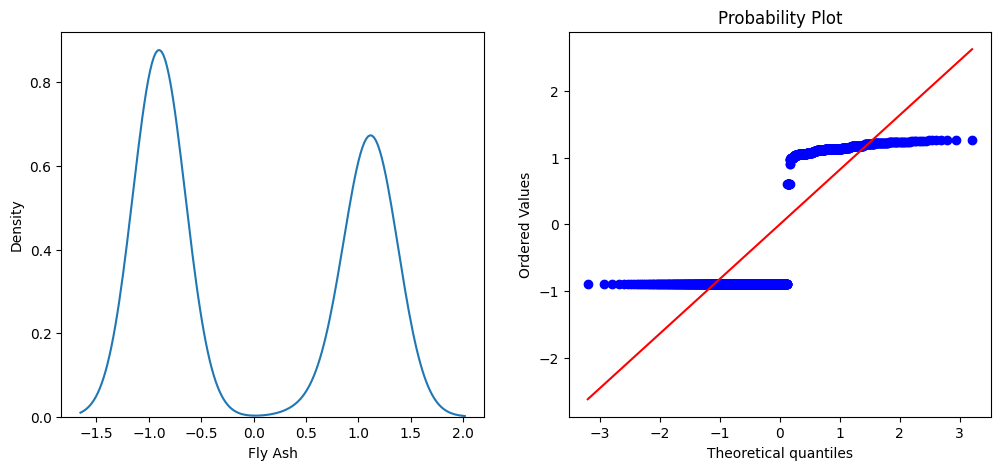

<ipython-input-70-377990799bb1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_transformed1[i],hist = False, ax = ax1)


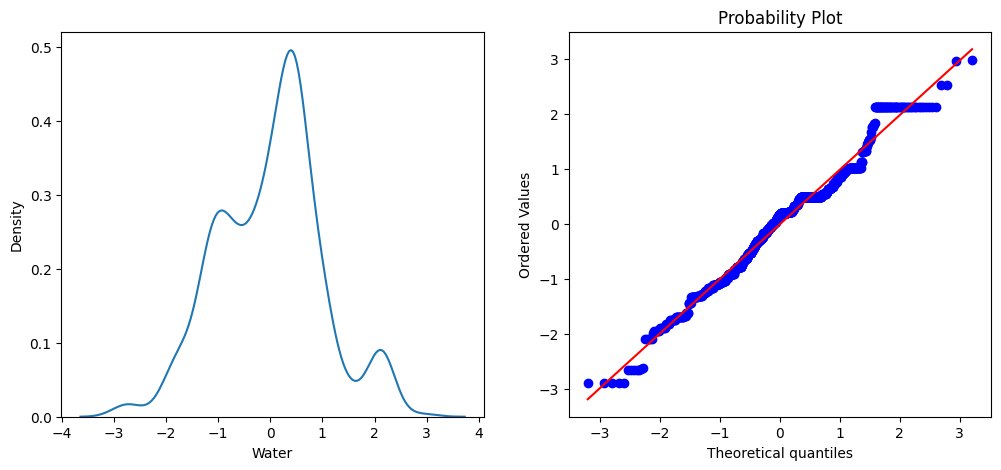

<ipython-input-70-377990799bb1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_transformed1[i],hist = False, ax = ax1)


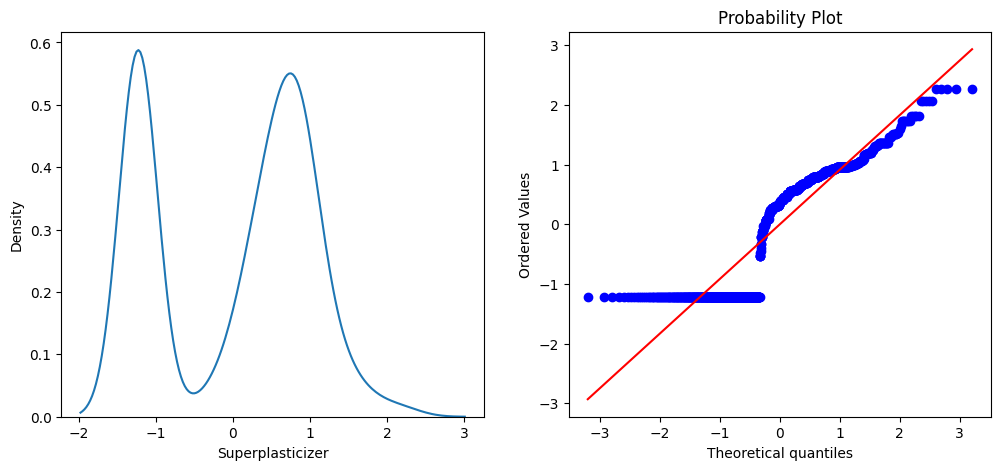

<ipython-input-70-377990799bb1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_transformed1[i],hist = False, ax = ax1)


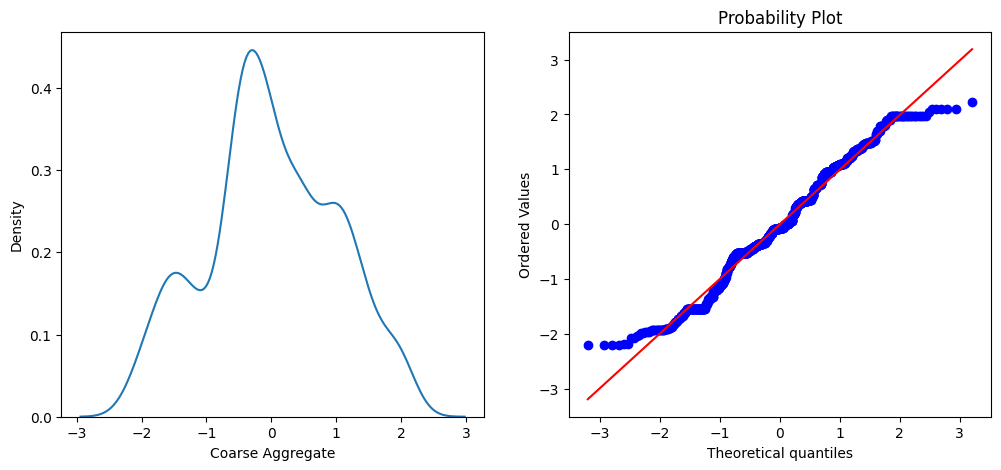

<ipython-input-70-377990799bb1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_transformed1[i],hist = False, ax = ax1)


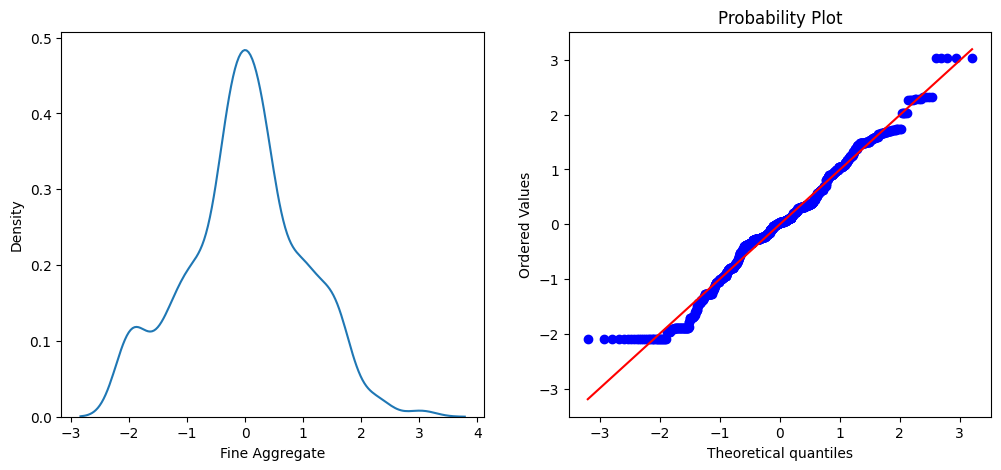

<ipython-input-70-377990799bb1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_transformed1[i],hist = False, ax = ax1)


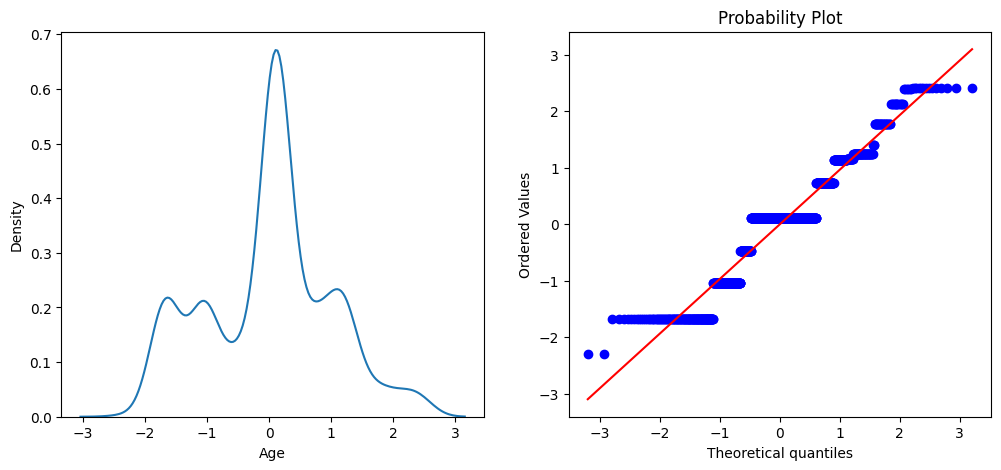

In [ ]:
X_transformed1 = pd.DataFrame(X_transformed1, columns = X_train.columns)
for i in df.drop(columns = ['Strength']).columns:
  fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (12,5))
  sns.distplot(X_transformed1[i],hist = False, ax = ax1)
  sc.probplot(X_transformed1[i],dist = 'norm', plot = ax2)
  plt.show()

# Binning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sc
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CAMPUS_X_LEC_19_DATASET.csv')
df = df[['Age','Fare','Survived']]
df

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0
...,...,...,...
886,27.0,13.0000,0
887,19.0,30.0000,1
888,NaN,23.4500,0
889,26.0,30.0000,1


In [ ]:
df.dropna(inplace = True)
df

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0
...,...,...,...
885,39.0,29.1250,0
886,27.0,13.0000,0
887,19.0,30.0000,1
889,26.0,30.0000,1


In [ ]:
X = df.loc[:,['Age','Fare']]
y = df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)
y_pred = DT.predict(X_test)
print(accuracy_score(y_pred,y_test))
print((cross_val_score(DT,X,y,cv = 5,scoring = 'accuracy')).mean())

0.6223776223776224
0.6190584063823501


In [ ]:
X_train

In [ ]:
KBin_age = KBinsDiscretizer(n_bins = 15,encode = 'ordinal',strategy = 'kmeans')
KBin_fare = KBinsDiscretizer(n_bins = 15,encode = 'ordinal',strategy = 'kmeans')
trf1 = ColumnTransformer(transformers = [
    ('kbin_age',KBin_age,[0]),
    ('kbin_fare',KBin_fare,[1])
],remainder = 'passthrough')

In [ ]:
X_train_transformed = trf1.fit_transform(X_train)
X_test_transformed = trf1.transform(X_test)
X_transformed = trf1.fit_transform(X)
DT = DecisionTreeClassifier()
DT.fit(X_train_transformed,y_train)
y_pred = DT.predict(X_test_transformed)
print(accuracy_score(y_pred,y_test))
print((cross_val_score(DT,X_transformed,y,cv = 5,scoring = 'accuracy')).mean())

0.7062937062937062
0.6471387767162415


Text(0.5, 1.0, 'After')

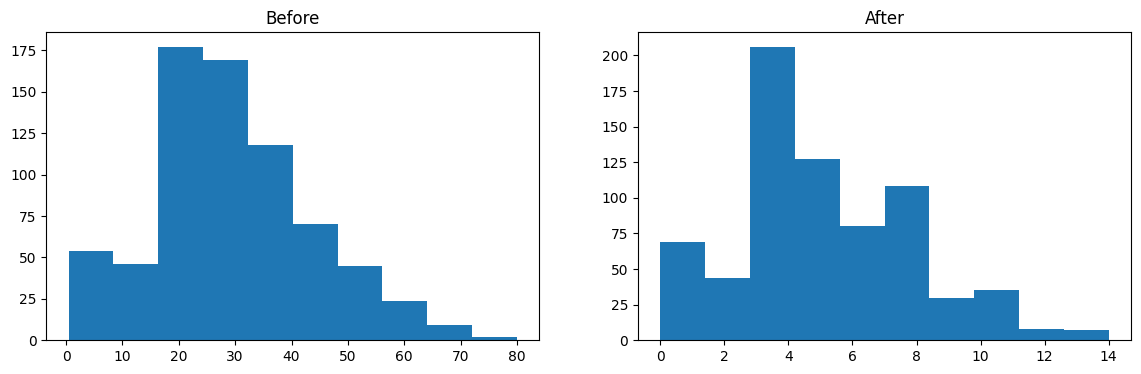

In [ ]:
X_transformed = pd.DataFrame(X_transformed, columns = X_train.columns)
plt.figure(figsize = (14,4))
plt.subplot(121)
plt.hist(X['Age'])
plt.title('Before')

plt.subplot(122)
plt.hist(X_transformed['Age'])
plt.title('After')

# Binarization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Binarizer
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CAMPUS_X_LEC_19_DATASET.csv')
df = df[['Age','Fare','SibSp','Parch','Survived']]
df['Family'] = df['SibSp'] + df['Parch']
df.drop(columns = ['SibSp','Parch'],inplace = True)
DT = DecisionTreeClassifier()
X = df.drop(columns = ['Survived'])
y = df['Survived']
X['Age'].fillna(X['Age'].mean(),inplace = True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)
DT.fit(X_train,y_train)
y_pred = DT.predict(X_test)
print(accuracy_score(y_pred,y_test))
print((cross_val_score(DT,X,y,cv = 5 , scoring = 'accuracy')).mean())

0.6902985074626866
0.6543280396710814


In [ ]:
df

,Age,Fare,Survived,Family
0,22.0,7.2500,0,1
1,38.0,71.2833,1,1
2,26.0,7.9250,1,0
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,1,0
888,NaN,23.4500,0,3
889,26.0,30.0000,1,0


In [ ]:
# Applying Binariztion
bin1 = Binarizer(copy = False)
trf1 = ColumnTransformer(transformers = [
    ('bin_',bin1,['Family'])
],remainder = 'passthrough')

X_transformed = trf1.fit_transform(X)
X_train_transformed = trf1.fit_transform(X_train)
X_test_transformed = trf1.transform(X_test)
DT.fit(X_train_transformed,y_train)
y_pred = DT.predict(X_test_transformed)
print(accuracy_score(y_pred,y_test))
print((cross_val_score(DT,X_transformed,y,cv = 5 , scoring = 'accuracy')).mean())
pd.DataFrame(X_train_transformed)
# Now family column came to left

0.6865671641791045
0.6408448936036658


,0,1,2
0,1.0,4.000000,22.0250
1,1.0,43.000000,211.3375
2,0.0,29.699118,7.8958
3,0.0,58.000000,146.5208
4,0.0,17.000000,12.0000
...,...,...,...
618,1.0,29.699118,23.4500
619,0.0,38.000000,7.0500
620,1.0,58.000000,113.2750
621,1.0,29.699118,15.2458


In [ ]:
print(np.unique(X_transformed[:,0]))

[0. 1.]


# Handling the Mixed Variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df = pd.read_csv('/content/drive/MyDrive/titanic.csv')

In [2]:
df

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0
...,...,...,...,...
886,NaN,211536,3,0
887,B42,112053,3,1
888,NaN,W./C. 6607,1,0
889,C148,111369,2,1


In [3]:
df['number'].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

array([139, 131, 129, 126, 126, 123, 117])

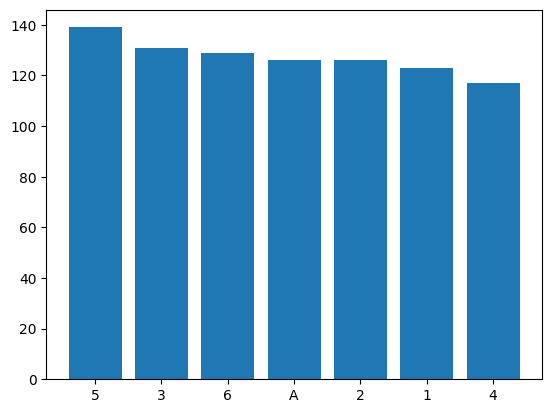

In [4]:
height = np.array(df['number'].value_counts())
fig1 = plt.bar(df['number'].unique(),height  = height) # important just keep it in mind.
height

In [5]:
df['numerical'] = pd.to_numeric(df['number'],errors = 'coerce',downcast = 'integer')
df['categorical'] = np.where(df['numerical'].isnull(),df['number'],np.nan)
# df['numerical'].isnull() is the condition
# if the above condition is true only than df['number'] will be there else np.nan
# will be there.
df

,Cabin,Ticket,number,Survived,numerical,categorical
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A
...,...,...,...,...,...,...
886,NaN,211536,3,0,3.0,NaN
887,B42,112053,3,1,3.0,NaN
888,NaN,W./C. 6607,1,0,1.0,NaN
889,C148,111369,2,1,2.0,NaN


In [6]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [7]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [13]:
df['Cabin_num'] = df['Cabin'].str.extract('(\d+)')
df['Cabin_cat'] = df['Cabin'].str[0]


<BarContainer object of 8 artists>

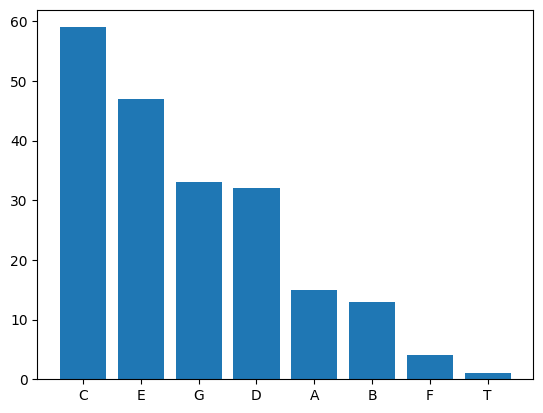

In [19]:
plt.bar((df['Cabin_cat'].dropna()).unique(),height = np.array((df['Cabin_cat'].dropna()).value_counts()))

In [33]:
df['Ticket_num'] = df['Ticket'].apply(lambda s : s.split()[-1])
df['Ticket_num'] = pd.to_numeric(df['Ticket_num'],errors = 'coerce',downcast = 'integer')
df['Ticket_cat'] = df['Ticket'].apply(lambda s : s.split()[0])
df['Ticket_cat'] = np.where(df['Ticket_cat'].str.isdigit(),np.nan,df['Ticket_cat'])
df

,Cabin,Ticket,number,Survived,numerical,categorical,Cabin_cat,Cabin_num,Ticket_num,Ticket_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN,21171.0,A/5
1,C85,PC 17599,3,1,3.0,NaN,C,85,17599.0,PC
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN,3101282.0,STON/O2.
3,C123,113803,3,1,3.0,NaN,C,123,113803.0,NaN
4,NaN,373450,A,0,NaN,A,NaN,NaN,373450.0,NaN
...,...,...,...,...,...,...,...,...,...,...
886,NaN,211536,3,0,3.0,NaN,NaN,NaN,211536.0,NaN
887,B42,112053,3,1,3.0,NaN,B,42,112053.0,NaN
888,NaN,W./C. 6607,1,0,1.0,NaN,NaN,NaN,6607.0,W./C.
889,C148,111369,2,1,2.0,NaN,C,148,111369.0,NaN


In [30]:
s = ('785:SWa')
s.split(':')
s = ('785 SWa')
s.split(' ')

['785', 'SWa']